<a href="https://colab.research.google.com/github/PikasXYZ/mobile-game-hack-4equals10/blob/main/X%3DY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction


This project is designed to crack a mobile game named "4=10"
In that game, you get 4 numbers while the goal is to make the result equal 10 with given operators which is not always contains all of the "＋", "－", "×", "÷".



▼The stage is clear in this case

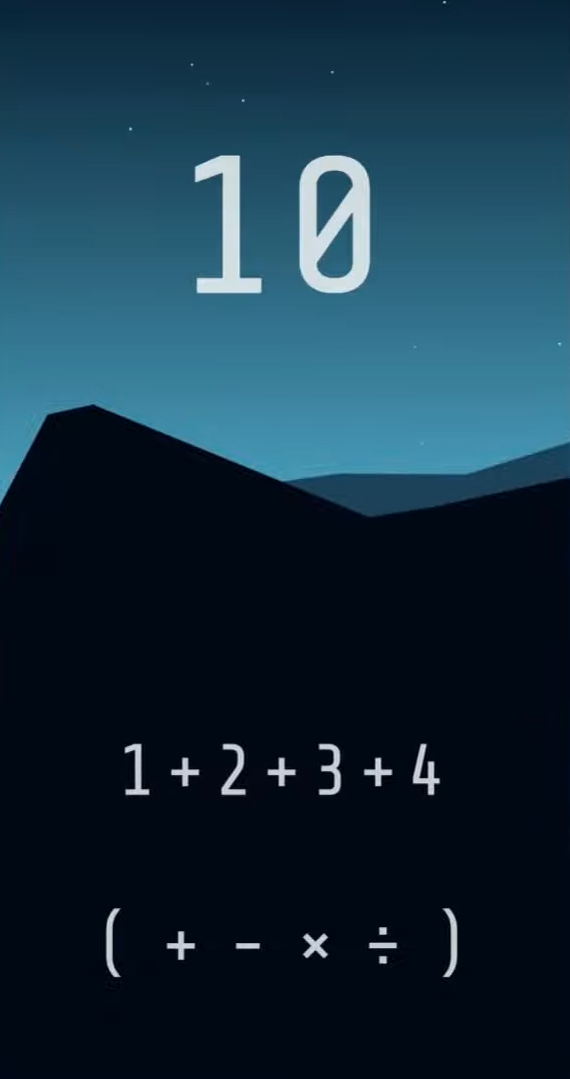

▼The stage is failed in this case

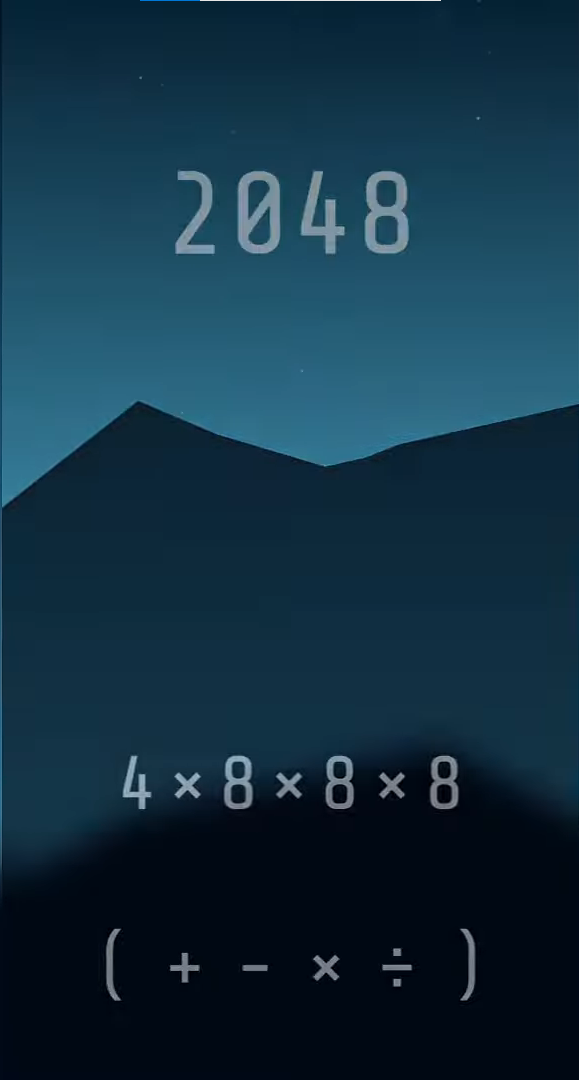

Visit [official website](https://fourequalsten.app/) for detailed info.!

#Imports & Functions

In [ ]:
#@title Import 
from itertools import permutations, combinations, combinations_with_replacement
from time import time
from google.colab import drive
from IPython.display import clear_output, display
import ipywidgets as widgets
import pandas as pd
import pickle
import os
import requests

In [ ]:
#@title Insert operators into given number list
def posibility(number_list, operators, pos=[]):
  pos = pos if pos else [number_list[0]]
  if len(number_list)>1:
    new_pos = [p + op + number_list[1] for op in operators for p in pos]
    # new_pos = []
    # for op in operators:
    #   for p in pos:
    #     new_pos.append(p + op + number_list[1])
    pos = posibility(number_list[1:],operators,new_pos)
  return pos

In [ ]:
#@title Add parentheses with possible ways into given number list array which is two-dimensional
def parentheses_added(pos, multiple_parentheses = False):
  new_pos = []
  for p in pos:
    seats = range(0,len(p),2) #position of numbers like [2,4,6,8...]
    for parentheses_amount in range(2,len(seats),2) if multiple_parentheses else [2]: #Setting amount of parentheses (maxium is len(seat) if using not only a pair of parentheses)
      chosen = list(permutations(seats, parentheses_amount)) #Choosing "parentheses_amount" position of parentheses from seats
      filted_chosen = chosen.copy() #Copying to prevent editing original "chosen"
      for c in chosen:
        for i in range(len(c)):
          if i%2 and c[i]<c[i-1]:
            filted_chosen.remove(c) #Remove when the number at odd index is smaller than its previous one
            break

      for c in filted_chosen:
        right = dict(zip(c,[c.index(seat)%2 for seat in c])) #Insert ")" when the index is odd else insert "("
        c = list(c) #Converting tuple to list for sorting
        c.sort() #Sorting for easy inserting
        new_p = p #Copying to prevent editing original "p"
        for idx, key in enumerate(c):
          new_p  = new_p[:key+1+idx] + ")" + new_p[key+1+idx:] if right[key] else new_p[:key+idx] + "(" + new_p[key+idx:]
        try:
          if eval(new_p) != eval(p):
            new_pos.append(new_p) #Append when parentheses-added one is different from the original one 
        except:
          continue #Preventing ZeroDivisionError

  return pos + new_pos

In [ ]:
#@title Make text more readable
def formalize(text):
  text = str(text)
  before = [str(i) for i in range(10)] + ["+", "-", "*" ,"/" ,"(" ,")"]
  after = ["０","１","２","３","４","５","６","７","８","９","＋","－","×","÷","（","）"]
  for b, a in zip(before, after):
    text = text.replace(b, a)
  return text

In [ ]:
#@title Convert sec to yr/d/hr/min/sec
def time_convertion_string(s):
  string = ''
  if s//31536000:
    string += f'{s//31536000:3.0f} yr '
    s%=31536000
  if s//86400:
    string += f'{s//86400:3.0f} d '
    s%=86400
  if s//3600:
    string += f'{s//3600:2.0f} hr '
    s%=3600
  if s//60:
    string += f'{s//60:2.0f} min '
    s%=60
  string += f'{s:2.0f} sec'
  return string

time_convertion_string(12345.6789)

' 3 hr 25 min 46 sec'

In [ ]:
#@title LINE Notify
def LineNotify(token, msg = '', img_dir = ''):
    #HTTP 標頭參數與資料
    headers = {"Authorization": "Bearer " + token} #token = API token of LINE Notify
    data = {'message': '\n' + msg}  # 要發送的訊息
    files = { 'imageFile': open(img_dir, 'rb') if img_dir else None} # 要傳送的圖片檔案
    #以 requests 發送 POST 請求
    requests.post("https://notify-api.line.me/api/notify", headers = headers, data = data, files = files)

In [ ]:
#@title Get Answers & Show
def GetAnsNShow(quiz_numer, operators, most=10):

  original_quiz = list(quiz_numer)
  quiz = set(permutations([str(int(q)) for q in original_quiz]))

  #Making "parentheses_added" malfunction when opertaor "()" is banned
  parentheses = "()" in operators
  if parentheses: operators.pop()
  
  #Finding ways to clear stage without altering positions of numbers and show when found
  perfect_ans = []
  for formula in parentheses_added(posibility(original_quiz,operators)) if parentheses else posibility(original_quiz,operators):
    try:
      if eval(formula) == Y: perfect_ans.append(formula)
      if len(perfect_ans) >= most: break
    except:
      continue #Preventing ZeroDivisionError

  if perfect_ans:
    print(f"\n【{len(perfect_ans)} Solutions Without Altering Position】" if len(perfect_ans)>1 else "\n【Only Solution Without Altering Position】")
    print("\n".join([formalize(A) for A in perfect_ans[:most]]))

  #Finding ways to clear stage by altering positions of numbers and show when found
  ans = []
  for q in quiz:
    for formula in parentheses_added(posibility(q,operators)) if parentheses else posibility(q,operators):
      try:
        if eval(formula) == Y: ans.append(formula)
        if len(ans) >= most - len(perfect_ans) : break
      except:
        continue #Preventing ZeroDivisionError
    if len(ans) >= most - len(perfect_ans) : break

  #Showing solutions
  if ans: print(f"\n【{len(ans)} Solutions With Altering Position】" if len(ans)>1 else "\n【Only Solution With Altering Position】")
  else: print("" if perfect_ans else "\n⚠️⚠️⚠️ Solution Not Found! ⚠️⚠️⚠️")
  print("\n".join([formalize(A) for A in ans[:most - len(perfect_ans)]]))

#Preprocessing

In [ ]:
#@title Prevent Interruption 
%%javascript
function ClickConnect(){
  console.log("Working");
  document
      .querySelector("#top-toolbar > colab-connect-button")
      .shadowRoot
      .querySelector("#connect")
      .click()
}

setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

#Main
##⚠️After changing any parameter in a cell, please run that cell again.⚠️
###⚠️After changing any parameter in a cell, please run that cell again.⚠️
####⚠️After changing any parameter in a cell, please run that cell again.⚠️
#####⚠️After changing any parameter in a cell, please run that cell again.⚠️

In [ ]:
#@title Please Select Mode and Set X & Y
mode = "Get Quiz" #@param ["Get Ans","Get Quiz", "Grid Search"]
X = 5 #@param {type:"integer"}
Y = 10 #@param {type:"integer"}
name = f"{X}={Y}"
print(f"mode : {mode} ({name})")

mode : Get Quiz (5=10)


In [ ]:
 #@title Mode "Get Ans"

if mode != "Get Ans":
  print(f"The mode you chose is \"{mode}\", thus this cell does nothing.")

else:
  button_total_width = 420
  quiz_input = widgets.Text(value='5'*X, layout=widgets.Layout(width = str(button_total_width)+'px'))
  print("Please input your quiz number:")
  display(quiz_input)

  def on_operator_button_clicked(button):
    button.style.button_color = None if button.style.button_color else 'gray' #Changing color to gray means banning that operators

  for idx, op in enumerate(["＋","－","×","÷","（）"]):
    globals()['button'+str(idx)] = widgets.Button(description = op,
                            button_style = 'info', 
                            style = {'font_weight': 'bold', 'color': 'navy'}, 
                            layout = widgets.Layout(width = str((button_total_width-16)//5) + 'px'))
    globals()['button'+str(idx)].on_click(on_operator_button_clicked)

  buttons = [globals()['button'+str(idx)] for idx in range(5)]
  buttons_box = widgets.HBox(buttons)
  print("\nClick any operator to ban it!")
  display(buttons_box)

  amount_of_ans2show_at_most = widgets.IntText(value=10, layout=widgets.Layout(width = str(button_total_width)+'px'))
  print("\nPlease enter amount of answers you want to see at most:")
  display(amount_of_ans2show_at_most)

  def on_get_ans_button_clicked(button):
    clear_output(wait=True)
    print("Please input your quiz number:")
    display(quiz_input)
    print("\nClick any operator to ban it!")
    display(buttons_box)
    print("\nPlease enter amount of answers you want to see at most:")
    display(amount_of_ans2show_at_most)
    print("\nGet Answer!")
    display(get_ans_button)
    quiz_number = quiz_input.value
    #Foolproof
    if not quiz_number: print("You didn't enter any quiz number!")
    elif len(quiz_number) != X: print("You entered too more quiz number!" if len(quiz_number)>X else "You entered too few quiz number!")
    elif not quiz_number.isnumeric(): print("Please enter NUMBERS only!")
    else:
      operators = [op for idx, op in enumerate(["+","-","*","/","()"]) if not globals()['button'+str(idx)].style.button_color]
      GetAnsNShow(quiz_number, operators, most = amount_of_ans2show_at_most.value)

  #Set the button used to get ans
  get_ans_button = widgets.Button(description="Get Ans!", layout=widgets.Layout(width = str(button_total_width)+'px'))
  get_ans_button.on_click(on_get_ans_button_clicked)
  print("\nGet Answer!")
  display(get_ans_button)

The mode you chose is "Get Quiz", thus this cell does nothing.


In [ ]:
#@title Mode "Get quiz"
if mode != "Get Quiz":
  print(f"The mode you chose is \"{mode}\", thus this cell does nothing.")

else:
  #@markdown #####Load quizzes data from here ↓ (Keep it default if you want to use author's quizzes data.)
  quizzes_data = "/content/mobile-game-hack-4equals10/quizzes data" #@param {type:"string"}
  if quizzes_data == "/content/mobile-game-hack-4equals10/quizzes data":
    !git clone https://github.com/PikasXYZ/mobile-game-hack-4equals10.git
    clear_output()

  if name+'.csv' not in os.listdir(quizzes_data):
    print(f"There\'s no corresponding quizzes data of {name}, try the following:")
    for idx, f in enumerate(os.listdir(quizzes_data)):
      if f.endswith('.csv'): print(f[:-4], end = ', ' if (idx+1)%5 else ',\n')
  else:
    df = pd.read_csv(os.path.join(quizzes_data, name+'.csv'), dtype={"Quiz": str})
    
    button_total_width = 420

    difficulty_choose = widgets.BoundedIntText(value=3, max=5, min=1, layout=widgets.Layout(width = str(button_total_width)+'px'))
    print("Difficulty:")
    display(difficulty_choose)

    amount_of_ans2show_at_most = widgets.IntText(value=10, layout=widgets.Layout(width = str(button_total_width)+'px'))
    print("\nPlease enter amount of answers you want to see at most:")
    display(amount_of_ans2show_at_most)
        
    def on_get_quiz_button_clicked(button):
      clear_output(wait=True)
      print("Difficulty:")
      display(difficulty_choose)
      print("\nPlease enter amount of answers you want to see at most:")
      display(amount_of_ans2show_at_most)
      print()
      display(get_quiz_button)
      difficulty = difficulty_choose.value
      print(f"\n【{name}】 (Difficulty : ", "★"*difficulty ,"☆"*(5-difficulty), ")", sep='')
      interval = max(df['Amount of Ans'])//5
      upper_limit = interval * (6-difficulty) if interval else max(df['Amount of Ans'])
      lower_limit = upper_limit - interval if interval else 0
      sample = df[(lower_limit<df['Amount of Ans']) & (df['Amount of Ans']<=upper_limit)].sample()
      for column_name, value in sample.iteritems():
        print(f"{column_name} : {value.iloc[0]}")

      def on_show_ans_button_clicked(button):
        Q = sample['Quiz'].iloc[0]
        operators = sample['Operators'].iloc[0].replace('＋','+').replace('－','-').replace('×','*').replace('÷','/').replace('（）','()').split(', ')
        GetAnsNShow(Q, operators, amount_of_ans2show_at_most.value)

      print()
      show_ans_button = widgets.Button(description="Show Ans!")
      show_ans_button.on_click(on_show_ans_button_clicked)
      display(show_ans_button)

    get_quiz_button = widgets.Button(description = 'Get Quiz!')
    get_quiz_button.on_click(on_get_quiz_button_clicked)
    print()
    display(get_quiz_button)

Difficulty:


BoundedIntText(value=5, layout=Layout(width='420px'), max=5, min=1)


Please enter amount of answers you want to see at most:


IntText(value=10, layout=Layout(width='420px'))

Button(description='Get Quiz!', style=ButtonStyle())


【5=10】 (Difficulty : ★★★★★)
Quiz : 57889
Operators : －, ×
Amount of Ans : 2



Button(description='Show Ans!', style=ButtonStyle())

In [ ]:
#@title Mode "Grid Search"
#@markdown ###Generate new quizzes data by yourself!
#@markdown #####⠀⠀
#@markdown #####Set LINE notify API token or token path of txt for reminding when generating is interrupted & at the end of generating. (OPTIONAL)
line_notify_api_token_path = "/content/drive/MyDrive/LineNotifyToken_self.txt" #@param {type:"string"}
line_notify_api_token = "" #@param {type:"string"}
#@markdown #####⠀⠀
#@markdown #####Set the folder where log data are stored. 
log_folder = "/content/drive/MyDrive/Colab Notebooks/4=10" #@param {type:"string"}
#@markdown #####⠀⠀
#@markdown #####Set the folder where quizzes data are stored.
output_folder = '/content/drive/MyDrive/Colab Notebooks/4=10' #@param {type:"string"}

if mode != "Grid Search":
  print(f"The mode you chose is \"{mode}\", thus this cell does nothing.")

else:
  drive.mount('/content/drive')

  #Get LINE Notify API token
  if os.path.exists(line_notify_api_token_path):
    with open(line_notify_api_token_path,'r') as f:
      line_notify_api_token = f.readline()
  print(f"Line Notify API token : {line_notify_api_token[:13]}...")

  #Setting location of log data
  log_folder_exsists = os.path.exists(log_folder)
  if not log_folder_exsists: os.mkdir(log_folder)

  #Loading log data 
  try:
    with open(os.path.join(log_folder, f'{name}.pickle'), 'rb') as f:
      log = pickle.load(f)
  except:
    log = [2, 0, 0, 0, pd.DataFrame(columns = ["Quiz", "Operators", "Amount of Ans"]), 0]
  df, time_spent = log[4], log[5] 
  print("log = ",log[:4])

  #Setting timers
  for i in range(4):
    globals()['t'+str(i)] = time()

  try:
    undone = lambda current, log: any(a>b for a, b in zip(current, log)) or current == log
    for amount_of_operator in range(2,6): #Using 2 to 5 operators
      if undone([amount_of_operator], log[:1]): #continue if done
        operators_pos = list(combinations(["+", "-", "*", "/", "()"], amount_of_operator)) #All posibilities of choosing what operators to use
        for idx, operators in enumerate(operators_pos):
          if undone([amount_of_operator, idx], log[:2]) and operators not in [("*","()"), ("+","()")]: #continue if done or operators are ("x","()")/("+","()")
            
            #Checking if parentheses were chosen or not
            operators_copy = list(operators).copy()
            parentheses = "()" in operators_copy
            if parentheses: operators_copy.pop() #Removing "()" if parentheses were chosen
            
            for idxx, num in enumerate(combinations_with_replacement(list("0123456789"), X)): #All posibilities of choosing X numbers from 0 to 9 (repeatable selection)
              if undone([amount_of_operator, idx, idxx], log[:3]): #continue if done
                quiz = set(permutations(num)) #All posibilities of arranging chosen numbers

                #Finding ways to clear stage
                ans = []
                for idxxx, q in enumerate(quiz):
                  if undone([amount_of_operator, idx, idxx, idxxx-1], log[:4]): #continue if done
                    #Making "parentheses_added" malfunction when opertaor "()" is banned 
                    for formula in parentheses_added(posibility(q, operators_copy)) if parentheses else posibility(q, operators_copy):
                      try:
                        if eval(formula) == Y: ans.append(formula)
                      except:
                        continue #Preventing ZeroDivisionError

                    #Saving log    
                    with open(os.path.join(log_folder, f'{name}.pickle'), 'wb') as f:
                      pickle.dump([amount_of_operator, idx, idxx, idxxx, df, time_spent], f)

                operators_f = [formalize(op) for op in operators] #Formalized operators for saving into df
                if ans: df.loc[len(df)] = ["".join(num), ", ".join(operators_f), len(ans)] #Saving data into df

                #Renewing time spent for saving into log
                time_spent += time()-t3
                t3 = time()

                clear_output(wait=True)
                current_process = sum([len(list(combinations(["+", "-", "*", "/", "()"], i))) for i in range(2,amount_of_operator)]) + idx
                overall_process = sum([len(list(combinations(["+", "-", "*", "/", "()"], i))) for i in range(2,6)])
                print(f"【{X}={Y}】\nlog[:4] : ",log[:4])
                print("current process of overall process  : {:-<100} {:.1f}%\t(current operators : {})".format("￭"* int(current_process/overall_process*100), current_process/overall_process*100, ", ".join(operators_f)))
                print("number process of current operators : {:-<100} {:.1f}%\t(current num : {})".format("￭"* int(idxx/len(list(combinations_with_replacement(list("0123456789"), X)))*100), idxx/len(list(combinations_with_replacement(list("0123456789"), X)))*100, "".join(num))) 
                print(f"time spent : {time_convertion_string(time_spent)}")

            LineNotify(line_notify_api_token, "{}:\n{} is finished.\t(time spent:{})\n".format(name, ", ".join(operators_f), time_convertion_string(time() - t2)))
            t2 = time()

        LineNotify(line_notify_api_token, "{}:\nThe series of {} operators is finished.\t(time spent:{})\n".format(name, amount_of_operator, time_convertion_string(time() - t1)))
        t1 = time()

    total_time = time_spent #The latter is more precise because user didn't interrupt during the running period
    LineNotify(line_notify_api_token, f"{name}:\nAll Finished!\t(time spent:{time_convertion_string(total_time)})")
    print(f"\n\n\nAll Finished!\t(time spent:{time_convertion_string(total_time)})")
    print("P.S. ", f"Log data will be saved in {log_folder}" if log_folder_exsists else f"{log_folder} was built for saving log data.")

    #Exporting DataFrame 
    df.to_csv(os.path.join(output_folder, name+".csv"), index=False, encoding='utf-8-sig') 
    print(f"Result was saved as {name}.csv in {output_folder}!")  

    #Estimating spent times
    print(f"{time_convertion_string(time_spent)} were spent with X = {X}","\nThe Following is estimated time spent if you want to test another X:")
    for i in [num for num in range(3,11) if num != X]:
      print(f"X = {i:<2} : {time_convertion_string(time_spent * 22**(i-X))}")

  except:
    #Saving log  
    with open(os.path.join(log_folder, f'{name}.pickle'), 'wb') as f:
      pickle.dump([amount_of_operator, idx, idxx, idxxx, df, time_spent], f)
    with open(os.path.join(log_folder, f'{name}.pickle'), 'rb') as f:
      print("\nInterrupted! (process log : ",pickle.load(f)[:4],")")
      LineNotify(line_notify_api_token, "Interrupted! (process log : ",pickle.load(f)[:4],")")
    print("P.S. ", f"Log data will be saved in {log_folder}" if log_folder_exsists else f"{log_folder} was built for saving log data.")